In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input


In [6]:
import os

# import data
path = '/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/eye-images/'

normal = os.path.join(path, '1_normal/')
cataract = os.path.join(path, '2_cataract/')
glaucoma = os.path.join(path, '2_glaucoma/')

print("Number of normal images: ", len(os.listdir(normal)))
print("Number of cataract images: ", len(os.listdir(cataract)))
print("Number of glaucoma images: ", len(os.listdir(glaucoma)))

Number of normal images:  300
Number of cataract images:  100
Number of glaucoma images:  101


In [31]:
import cv2

def load_images(directories, n_images=900000):
    """
    Reads in images and assigns class labels
    Parameters:
        directories: A list of the sub-directories
        n_images:    The maximum number of images to load from each directory
    Returns:
        images (numpy.ndarray) : Image data
        label (numpy.ndarray      : Labels of each image
    """
    images = []
    images_col = []
    labels = []
    for label, sub_dir in enumerate(directories):
        num=1
        for file_name in os.listdir(sub_dir):
            if num > n_images:
                break
            img_path = os.path.join(sub_dir, file_name)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (100, 100))  # Resize to a smaller, consistent shape
                gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                images.append(gray_image)
                img_col = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                images_col.append(img_col)
                labels.append(label)  # 0 for Uninfected 1 for Parasitized
                num+=1
    return np.array(images), np.array(images_col), np.array(labels)

In [32]:
images, images_col, labels = load_images([normal, cataract, glaucoma])

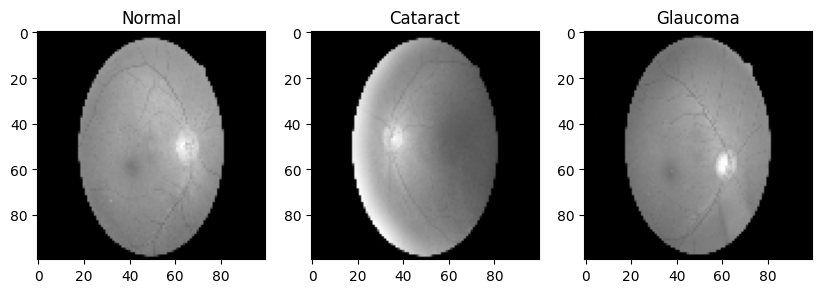

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(images[1],cmap="gray")
plt.title("Normal")
plt.subplot(1, 3, 2)
plt.imshow(images[301],cmap="gray")
plt.title("Cataract")
plt.subplot(1, 3, 3)
plt.imshow(images[401],cmap="gray")
plt.title("Glaucoma")
plt.show()


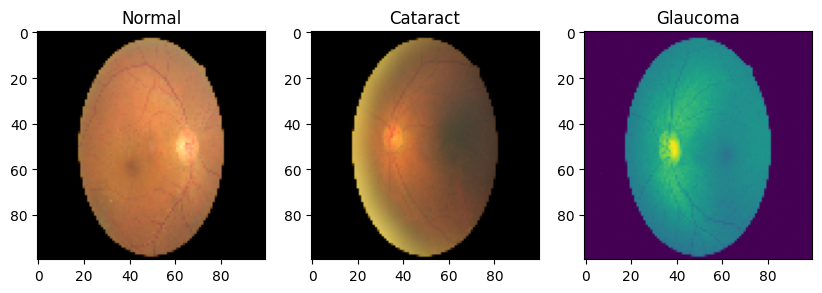

In [49]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(images_col[1])
plt.title("Normal")
plt.subplot(1, 3, 2)
plt.imshow(images_col[301])
plt.title("Cataract")
plt.subplot(1, 3, 3)
plt.imshow(images[402])
plt.title("Glaucoma")
plt.show()

In [43]:
# Split the data into training and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [59]:
# Build an NN model
model = Sequential([
  Input(shape=(100,100)),   # The image is 100x100 pixels.
  Flatten(),
  Dense(units=4048, activation='relu'),
  Dense(units=2048, activation='relu'),  # Increased dense layer size
  Dense(units=1024, activation='relu'),  # Increased dense layer size
  Dense(units=512, activation='relu'),  # Increased dense layer size
  Dense(units=256, activation='relu'),  # Increased dense layer size
  Dense(units=128, activation='relu'),  # Increased dense layer size
  Dense(units=64, activation='relu'),  # Increased dense layer size
  Dense(units=32, activation='relu'),  # Increased dense layer size
  Dense(3, activation='softmax')  # Two state classification - gives probability of belonging to class 0 or 1
])


In [61]:
model.compile(optimizer=Adam(learning_rate= 0.003),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy', 'categorical_accuracy'])

# Print the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 4048)           │    40,484,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2048)           │     8,292,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51,574,035 (196.74 MB)

 Trainable params: 51,574,035 (196.74 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
history = model.fit(x=X_train, y=y_train, batch_size=50,
                      epochs=20, shuffle=True,
                      validation_split=0.2)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.3959 - categorical_accuracy: 0.0156 - loss: 2751.9985 - val_accuracy: 0.2125 - val_categorical_accuracy: 0.0000e+00 - val_loss: 537.3980
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.2844 - categorical_accuracy: 0.0849 - loss: 268.5222 - val_accuracy: 0.5625 - val_categorical_accuracy: 0.0000e+00 - val_loss: 45.1921
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.5329 - categorical_accuracy: 0.0000e+00 - loss: 21.2655 - val_accuracy: 0.2250 - val_categorical_accuracy: 1.0000 - val_loss: 3.2278
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step - accuracy: 0.4576 - categorical_accuracy: 0.2203 - loss: 2.5863 - val_accuracy: 0.5625 - val_categorical_accuracy: 0.0000e+00 - val_loss: 1.1912
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step - accuracy: 0.5462 - categorical_accuracy: 0.2359 - loss: 1.5117 - val_accuracy: 0.5625 - val_categorical_accuracy: 0.0000e+00 - val_loss: 1.1650
Epoch 6/20


In [65]:
epochs = history.epoch
hist = pd.DataFrame(history.history)
hist

,accuracy,categorical_accuracy,loss,val_accuracy,val_categorical_accuracy,val_loss
0,0.453125,0.062500,2488.438965,0.2125,0.0000,537.398010
1,0.318750,0.156250,163.860947,0.5625,0.0000,45.192108
2,0.553125,0.000000,17.629490,0.2250,1.0000,3.227777
3,0.503125,0.156250,2.170717,0.5625,0.0000,1.191240
4,0.578125,0.218750,1.430264,0.5625,0.0000,1.165015
5,0.559375,0.468750,1.077141,0.2250,1.0000,1.150137
6,0.571875,0.000000,1.053797,0.5625,0.0000,1.120621
7,0.631250,0.156250,0.987078,0.5625,0.0000,1.047096
8,0.631250,0.062500,0.928953,0.5625,0.0000,1.016837
9,0.631250,0.000000,0.940698,0.5625,0.0000,1.060660


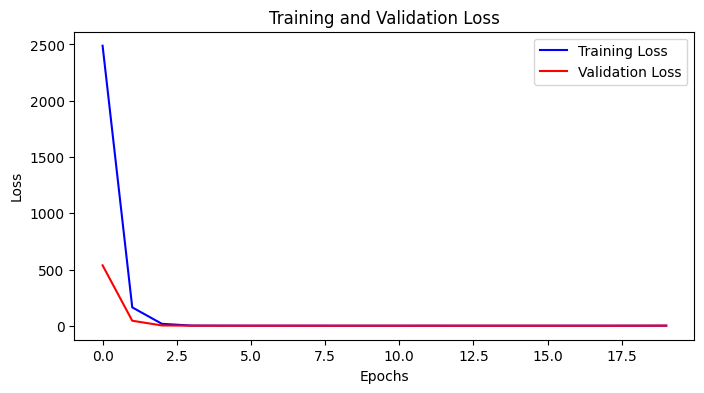

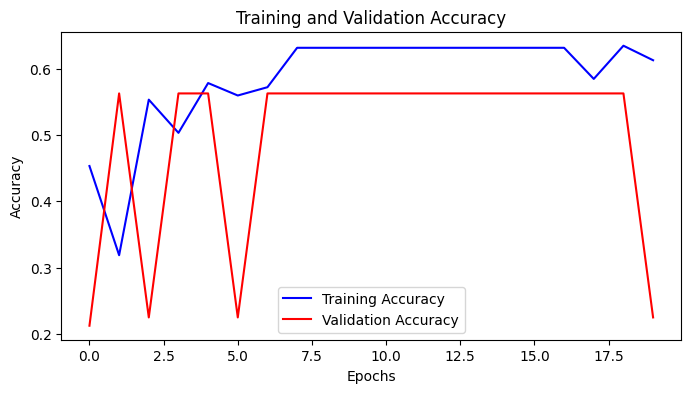

In [66]:
epochs = history.epoch
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

accuracy_values = history.history['accuracy']
val_accuracy_values = history.history['val_accuracy']

plt.figure(figsize=(8, 4))
plt.plot(epochs, loss_values, 'b', label='Training Loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 4))
plt.plot(epochs, accuracy_values, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy_values, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [67]:
# Use the model to make predictions on the testset
y_pred_prob = model.predict(X_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [68]:
y_pred_prob[0:20]

array([[0.0403674 , 0.95831233, 0.00132025],
       [0.10075997, 0.8904795 , 0.00876054],
       [0.21400489, 0.75809216, 0.02790292],
       [0.0864625 , 0.90781736, 0.00572018],
       [0.20072387, 0.78552246, 0.01375364],
       [0.05048295, 0.9475244 , 0.00199257],
       [0.10484034, 0.88560075, 0.00955891],
       [0.13529746, 0.8480723 , 0.01663026],
       [0.24469598, 0.6941588 , 0.06114522],
       [0.5012583 , 0.41512647, 0.08361518],
       [0.0915089 , 0.9029767 , 0.00551446],
       [0.20312458, 0.7582801 , 0.03859524],
       [0.2719953 , 0.69190156, 0.03610315],
       [0.15112187, 0.82924885, 0.01962924],
       [0.07028254, 0.92556673, 0.0041506 ],
       [0.37429613, 0.58903   , 0.03667386],
       [0.1509915 , 0.82762563, 0.02138278],
       [0.14306344, 0.841313  , 0.01562361],
       [0.11821652, 0.8701419 , 0.01164153],
       [0.1532149 , 0.8329906 , 0.01379453]], dtype=float32)

In [70]:
y_pred = y_pred_prob.argmax(axis=1)
y_pred


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

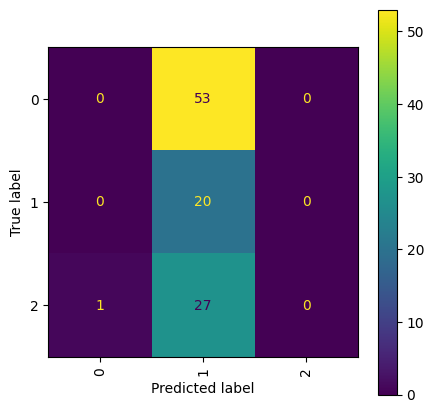

In [72]:
cm  = confusion_matrix(y_test, y_pred)
cmdisp = ConfusionMatrixDisplay(confusion_matrix=cm)
fig, ax = plt.subplots(figsize=(5, 5))
cmdisp.plot(include_values=True, cmap="viridis", ax=ax, xticks_rotation="vertical")
plt.show()

In [73]:
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.20      1.00      0.33        20
           2       0.00      0.00      0.00        28

    accuracy                           0.20       101
   macro avg       0.07      0.33      0.11       101
weighted avg       0.04      0.20      0.07       101



/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/mayongzhi/Desktop/MSc_Applied_Bioinformatics/AI&ML/Assessment/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicte